In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from IPython.display import HTML
from matplotlib.colors import LogNorm
import numpy as np

cmap = plt.get_cmap('RdYlBu_r')
norm = LogNorm()

def plot_surface(x, y,z, azim=-60, elev=40, dist=10, cmap="RdYlBu_r"):
    fig=plt.figure()
    ax=fig.add_subplot(111, projection='3d')
    plot_args = {'rstride':1, 'cstride':1, 'cmap':cmap, 
                 'linewidth':20, 'antialiased':True, 'vmin':-2, 'vmax':2}
    ax.plot_surface(x,y,z, **plot_args)
    ax.view_init(azim=azim, elev=elev)
    ax.dist=dist
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    ax.set_zlim(-1,1)
    
    plt.xticks([-1,-0.5,0,0.5,1], ["1", "-1/2", "0", "1/2", "1"])
    plt.yticks([-1,-0.5,0,0.5,1], ["1", "-1/2", "0", "1/2", "1"])
    ax.set_zticks([-2,-1,0,1,2])
    ax.set_zticklabels(["-2", "-1", "0", "1", "2"])
    
    ax.set_xlabel("x", fontsize=18)
    ax.set_ylabel("y", fontsize=18)
    ax.set_zlabel("z", fontsize=18)
    return fig, ax;

def overlay_trajectory_quiver(ax, obj_func, trajectory, color='k'):
    xs = trajectory[:,0]
    ys = trajectory[:,1]
    zs=obj_func(xs,ys)
    ax.quiver(
        xs[:-1], ys[:-1], zs[:-1],
        xs[1:]-xs[:-1], ys[1:]-ys[:-1], zs[1:]-zs[:-1],
        color=color,
        arrow_length_ratio=0.3
    )
    
    return ax

def overlay_trajectory(ax, obj_func, trajector, label, color='k'):
    xs=trajector[:, 0]
    ys=trajector[:, 1]
    zs=obj_func(xs,ys)
    ax.plot(xs, ys, zs, color, label=label)
    return ax

def overlay_trajectory_contour_M(ax, trajector, label, color='k', lw=2):
    xs=trajector[:,0]
    ys=trajector[:,1]
    ax.plot(xs, ys, color, label=label, lw = lw)
    ax.plot(xs[-1], ys[-1], color+'>', markersize=14)
    
    return ax

def overlay_trajectory_contour(ax, trajector, label, color='k', lw=2):
    xs=trajector[:,0]
    ys=trajector[:,1]
    ax.plot(xs, ys, color, label=label, lw = lw)
    
    return ax


    

In [2]:
def monkey_saddle(x,y):
    return x**3-3*x*y**2

def grad_monkey_saddle(params):
    x=params[0]
    y=params[1]
    grad_x=3*x**2-3*y**2
    grad_y=-6*x*y
    return [grad_x, grad_y]

def saddle_surface(x,y,a=1,b=1):
    return a*x**2-b*y**2

def grad_saddle_surface(params, a=1, b=1):
    x=params[0]
    y=params[1]
    grad_x= a*x
    grad_y=-1*b*y
    return [grad_x, grad_y]

def minima_surface(x, y, a=1, b=1):
    return a*x**2+b*y**2-1

def grad_minima_surface(params, a=1, b=1):
    x=params[0]
    y=params[1]
    grad_x=2*a*x
    grad_y=2*b*y
    return [grad_x, grad_y]


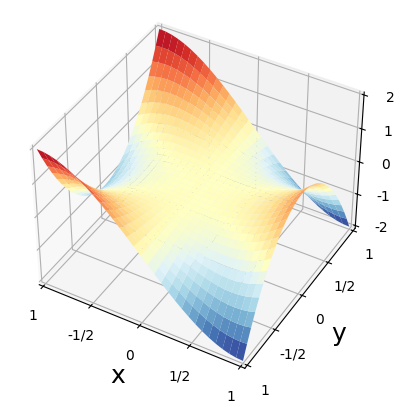

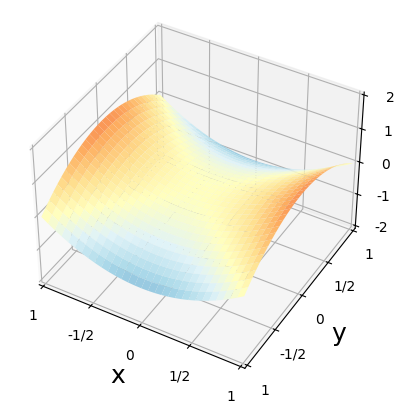

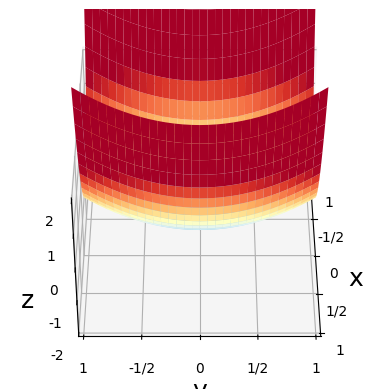

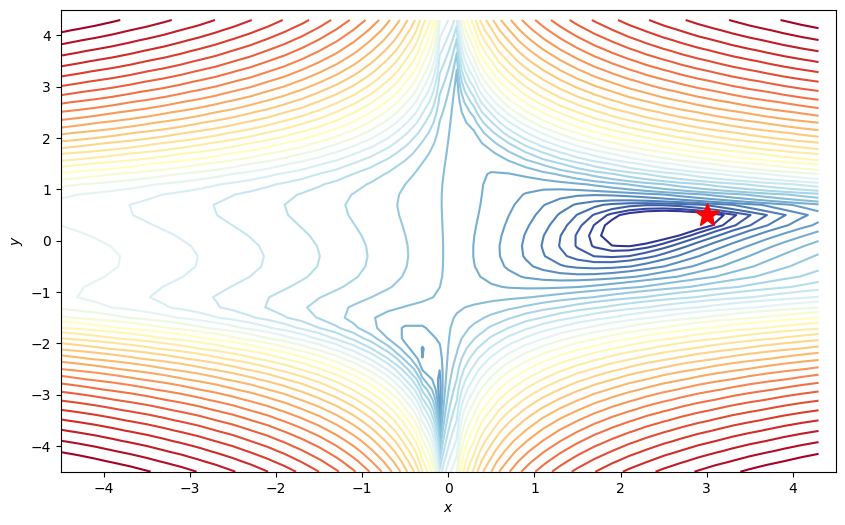

In [3]:
def beales_function(x, y):
    return np.square(1.5-x+x*y)+np.square(2.25 -x +x*y**2)+np.square(2.625-x-x*y**3)

def grad_beales_function(params):
    x=params[0]
    y=params[1]
    grad_x=2*(1.5- x+x*y)*(-1+y)+2*(2.25-x+x*y**2)*(-1+y**2)+2*(2.625-x-x*y**2)*(-1+y**3)
    grad_y=2*(1.5-x+x*y)*x+4*(2.25-x+x*y**2)*x*y+6*(2.625-x+x*y**3)*x*y**2
    return [grad_x, grad_y]

def contour_beales_function():
    x,y=np.meshgrid(np.arange(-4.5, 4.5, 0.2), np.arange(-4.5, 4.5, 0.2))
    
    fig, ax=plt.subplots(figsize=(10,6))
    
    z=beales_function(x, y)
    
    cax= ax.contour(x, y, z, levels=np.logspace(0,5, 35), norm=LogNorm(),cmap='RdYlBu_r')

    ax.plot(3, 0.5, 'r*', markersize=18)
    
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_xlim((-4.5, 4.5))
    ax.set_ylim((-4.5, 4.5))
    
    return fig, ax

plt.close()
x, y=np.mgrid[-1:1:31j, -1:1:31j]
fig1,ax1=plot_surface(x, y, monkey_saddle(x, y))
fig2, ax2=plot_surface(x, y, saddle_surface(x, y))
fig3, ax3 = plot_surface(x, y, minima_surface(x, y, 5), 0)
fig4, ax4 = contour_beales_function()
plt.show()

In [4]:
def gd(grad, init, n_epochs=1000, eta=10**-4, noise_strength=0):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        v = eta*(np.array(grad(params))+noise)
        params=params-v
        param_traj[j+1, ]=params
    return param_traj

def gd_with_mom(grad,init, n_epochs=5000, eta=10**-4, gamma=0.9, noise_strength=0):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1, 2])
    param_traj[0,]=init
    v=0
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        v = gamma*v+eta*(np.array(grad(params))+noise)
        params= params-v
        param_traj[j+1, ]=params
    return param_traj

def NAG(grad, init, n_epochs=5000, eta=10**-4, gamma=0.9,noise_strength=0):
    params= np.array(init)
    param_traj=np.zeros([n_epochs+1, 2])
    param_traj[0,]=init
    v=0
    for j in range(n_epochs):
        noise = noise_strength*np.random.randn(params.size)
        params_nesterov=params-gamma*v
        v=gamma*v+eta*(np.array(grad(params_nesterov))+noise)
        params= params-v
        param_traj[j+1, ]=params
    return param_traj

        

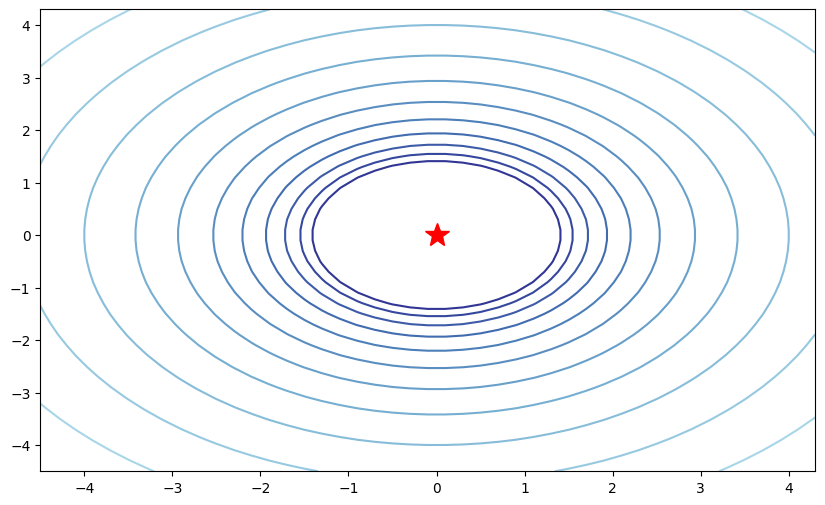

In [31]:
plt.close()
a,b=1.0,1.0
x,y=np.meshgrid(np.arange(-4.5, 4.5, 0.2), np.arange(-4.5, 4.5, 0.2))
fig, ax=plt.subplots(figsize=(10,6))
z=np.abs(minima_surface(x,y,a,b))
ax.contour(x, y, z, levels=np.logspace(0.0,5,35), norm=LogNorm(), cmap="RdYlBu_r")
ax.plot(0.0,'r*', markersize=18)
init1=[-2,4]
init2=[-1.7,4]
init3=[-1.5,4]
init4=[-3, 4.5]
eta1=0.1
eta2=0.5
eta3=1
eta4=1.01


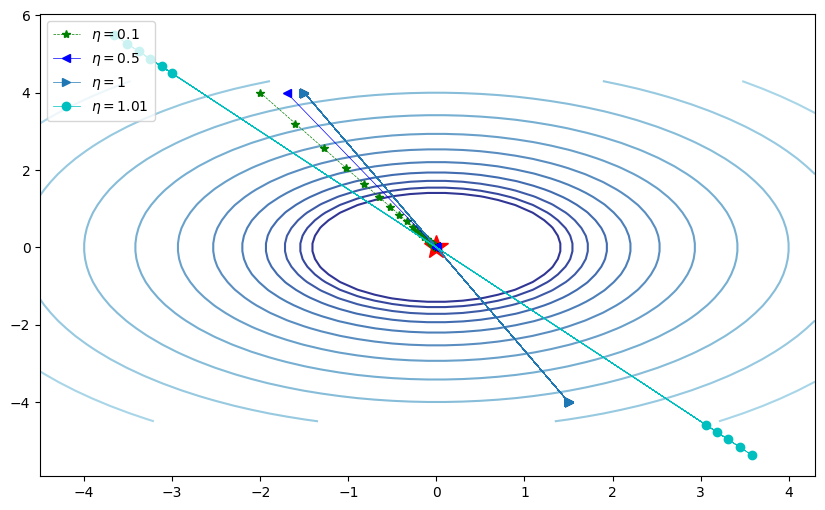

In [47]:
plt.close()
a,b=1.0,1.0
x,y=np.meshgrid(np.arange(-4.5, 4.5, 0.2), np.arange(-4.5, 4.5, 0.2))
fig, ax=plt.subplots(figsize=(10,6))
z=np.abs(minima_surface(x,y,a,b))
ax.contour(x, y, z, levels=np.logspace(0.0,5,35), norm=LogNorm(), cmap="RdYlBu_r")
ax.plot(0.0,'r*', markersize=18)
init1=[-2,4]
init2=[-1.7,4]
init3=[-1.5,4]
init4=[-3, 4.5]
eta1=0.1
eta2=0.5
eta3=1
eta4=1.01

gd_1=gd(grad_minima_surface, init1, n_epochs=100, eta=eta1)
gd_2=gd(grad_minima_surface, init2, n_epochs=100, eta=eta2)
gd_3=gd(grad_minima_surface, init3, n_epochs=100, eta=eta3)
gd_4=gd(grad_minima_surface, init4, n_epochs=10, eta=eta4)

overlay_trajectory_contour(ax, gd_1, '$\eta=$%s'%eta1, 'g--*', lw=0.5)
overlay_trajectory_contour(ax, gd_2, '$\eta=$%s'%eta2, 'b-<', lw=0.5)
overlay_trajectory_contour(ax, gd_3, '$\eta=$%s'%eta3, '->', lw=0.5)
overlay_trajectory_contour(ax, gd_4, '$\eta=$%s'%eta4, 'c-o', lw=0.5)
plt.legend(loc=2)
plt.show()
fig.savefig('GD3regimesNAG.pdf', bbox_inches='tight')

/var/folders/kt/7k22p1ns6l7ggtc7ck9nkqbw0000gn/T/ipykernel_40236/1430151844.py:7: RuntimeWarning: overflow encountered in scalar power
  grad_x=3*x**2-3*y**2
/var/folders/kt/7k22p1ns6l7ggtc7ck9nkqbw0000gn/T/ipykernel_40236/1430151844.py:7: RuntimeWarning: invalid value encountered in scalar subtract
  grad_x=3*x**2-3*y**2
/var/folders/kt/7k22p1ns6l7ggtc7ck9nkqbw0000gn/T/ipykernel_40236/1430151844.py:8: RuntimeWarning: overflow encountered in scalar multiply
  grad_y=-6*x*y


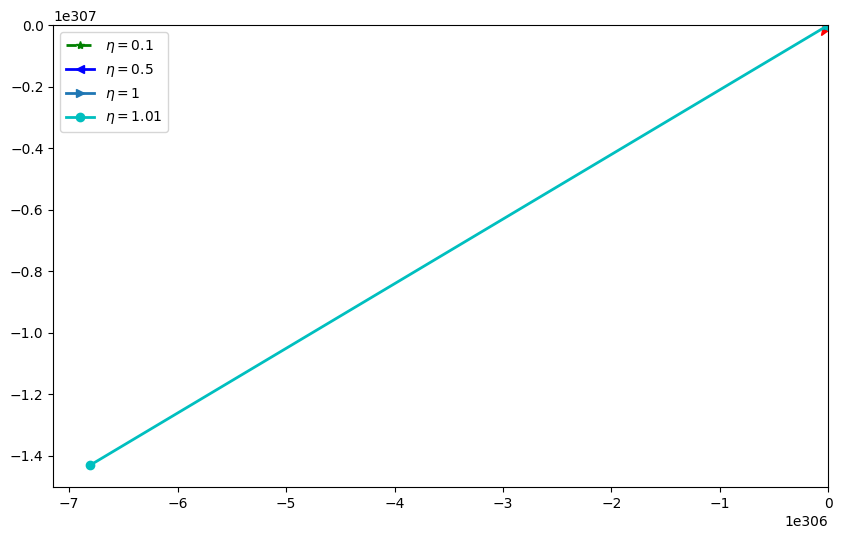

In [49]:
plt.close()
a,b=1.0,1.0
x,y=np.meshgrid(np.arange(-4.5, 4.5, 0.2), np.arange(-4.5, 4.5, 0.2))
fig, ax=plt.subplots(figsize=(10,6))
z=np.abs(monkey_saddle(x,y))+1
ax.contour(x, y, z, levels=np.logspace(0.0,3,35), norm=LogNorm(), cmap="RdYlBu_r")
ax.plot(0.0,'r*', markersize=18)
init1=[-2,4]
init2=[-1.7,4]
init3=[-1.5,4]
init4=[-3, 4.5]
eta1=0.1
eta2=0.5
eta3=1
eta4=1.01
gd_1=gd_with_mom(grad_monkey_saddle, init1, n_epochs=100, eta=eta1)
gd_2=gd_with_mom(grad_monkey_saddle, init2, n_epochs=100, eta=eta2)
gd_3=gd_with_mom(grad_monkey_saddle, init3, n_epochs=100, eta=eta3)
gd_4=gd_with_mom(grad_monkey_saddle, init4, n_epochs=10, eta=eta4)

overlay_trajectory_contour(ax, gd_1, '$\eta=$%s'%eta1, 'g--*')
overlay_trajectory_contour(ax, gd_2, '$\eta=$%s'%eta2, 'b-<')
overlay_trajectory_contour(ax, gd_3, '$\eta=$%s'%eta3, '->')
overlay_trajectory_contour(ax, gd_4, '$\eta=$%s'%eta4, 'c-o')
plt.legend(loc=2)

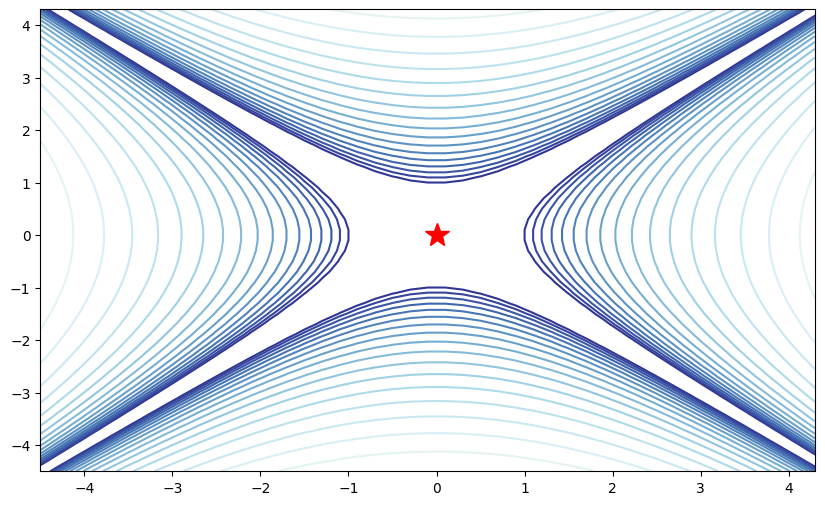

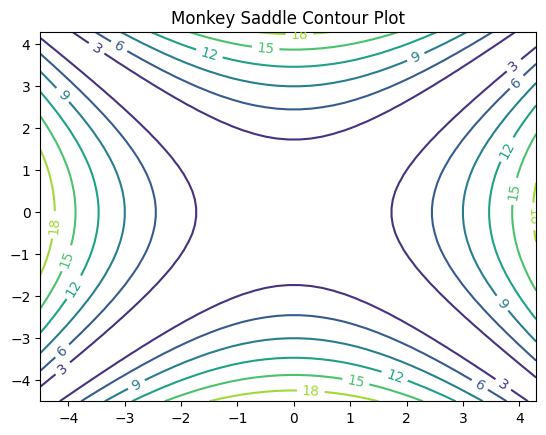

In [48]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

plt.close()
a,b=1.0,1.0
x,y=np.meshgrid(np.arange(-4.5, 4.5, 0.2), np.arange(-4.5, 4.5, 0.2))
fig, ax=plt.subplots(figsize=(10,6))
z1=np.abs(saddle_surface(x,y))+0.00001
ax.contour(x, y, z1, levels=np.logspace(0.0,3,40), norm=LogNorm(), cmap="RdYlBu_r")
ax.plot(0.0, 0.0,'r*', markersize=18) # changed this line
init1=[-2,-4]
init2=[-1.7,4]
init3=[-1.5,4]
init4=[-4, 4.5]
eta1=0.1
eta2=0.5
eta3=1
eta4=1.01

# gd_1=NAG(grad_saddle_surface, init1, n_epochs=100, eta=eta1)
# gd_2=NAG(grad_saddle_surface, init2, n_epochs=100, eta=eta2)
# gd_3=NAG(grad_saddle_surface, init3, n_epochs=100, eta=eta3)
# gd_4=NAG(grad_saddle_surface, init4, n_epochs=10, eta=eta4)

# overlay_trajectory_contour(ax, gd_1, '$\eta=$%s'%eta1, 'g--*', lw=0.5)
# overlay_trajectory_contour(ax, gd_2, '$\eta=$%s'%eta2, 'b-<', lw=0.5)
# overlay_trajectory_contour(ax, gd_3, '$\eta=$%s'%eta3, '->', lw=0.5)
# overlay_trajectory_contour(ax, gd_4, '$\eta=$%s'%eta4, 'c-o', lw=0.5)
plt.figure()
CS = plt.contour(x, y, z1) # changed this line
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Monkey Saddle Contour Plot')
plt.show()


In [35]:
def rms_prop(grad, init, n_epochs=5000, eta = 10**-3, beta=0.9, epsilon=10**-8, noise_strength=0):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    grad_sq=0
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        g=np.array(grad(params))+noise
        grad_sq=beta*grad_sq+(1-beta)*g*g
        v=eta*np.divide(g, np.sqrt(grad_sq+epsilon))
        params=params-v
        param_traj[j+1, ]=params
    return param_traj

def adams(grad, init, n_epochs=5000, eta=10**-4, gamma=0.9, beta=0.99, epsilon=10**-8, noise_strength=0):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    grad_sq=0
    v=0
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        g=np.array(grad(params))+noise
        v=gamma*v+(1-gamma)*g
        grad_sq=beta*grad_sq+(1-beta)*g*g
        v_hat=v/(1-gamma)
        grad_sq_hat=grad_sq/(1-beta)
        params=params-eta*np.divide(v_hat, np.sqrt(grad_sq_hat+epsilon))
        param_traj[j+1, ]=params
    return param_traj

NameError: name 'rms_prop' is not defined

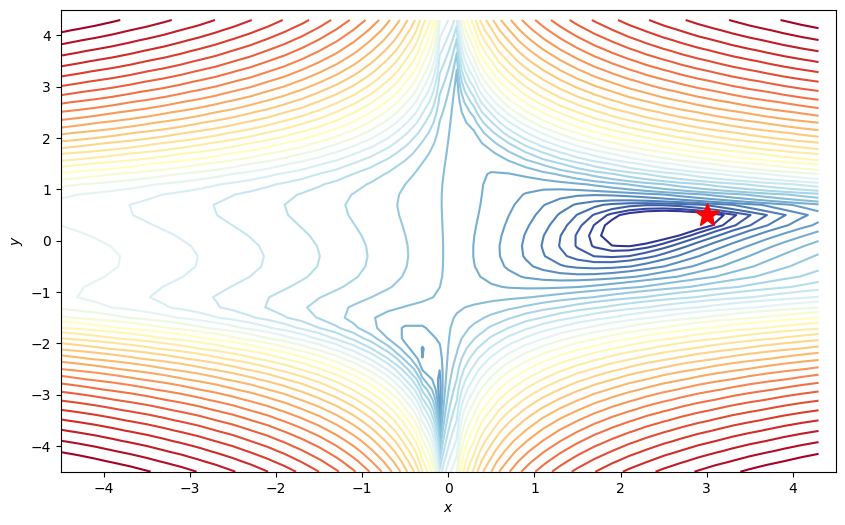

In [34]:
plt.close()
Nsteps=10**4
lr_l=10**-3
lr_s=10**-6

init1=np.array([4,3])
fig1, ax1=contour_beales_function()

gd_trajectory1=gd(grad_beales_function, init1, Nsteps, eta=lr_s, noise_strength=0)
gdm_trajectory1=gd_with_mom(grad_beales_function, init1, Nsteps, eta=lr_s, gamma=0.9, noise_strength=0)
NAG_trajectory1=NAG(grad_beales_function, init1, Nsteps, eta=lr_s,gamma=0.9, noise_strength=0)
rms_prop_trajectory1=rms_prop(grad_beales_function, init1, Nsteps, eta=lr_l, beta=0.9, epsilon=10**-8, noise_strength=0)
adams_trajectory1=adams(grad_beales_function, init1, Nsteps, eta=lr_l, gamma=0.9, beta=0.99, epsilon=10**-8, noise_strength=0)

overlay_trajectory_contour_M(ax1, gd_trajectory1, "GD", "k")
overlay_trajectory_contour_M(ax1, gdm_trajectory1, "GDM", "m")
overlay_trajectory_contour_M(ax1, NAG_trajectory1, "NAG", "c--")
overlay_trajectory_contour_M(ax1, rms_prop_trajectory1, "RMS", "b-.")
overlay_trajectory_contour_M(ax1, adams_trajectory1, "ADAMS", "r")

plt.legend(loc=2)


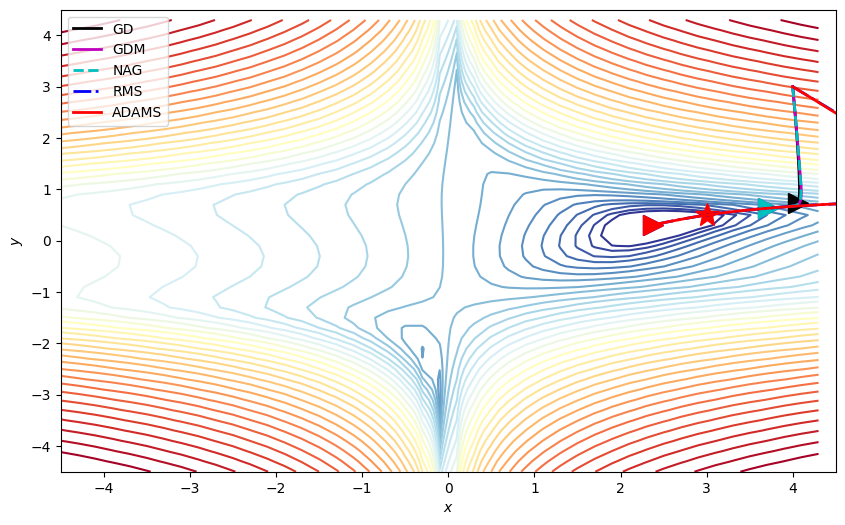

In [38]:
plt.close()
Nsteps=10**4
lr_l=10**-3
lr_s=10**-6

init1=np.array([4,3])
fig1, ax1=contour_beales_function()

gd_trajectory1=gd(grad_beales_function, init1, Nsteps, eta=lr_s, noise_strength=0)
gdm_trajectory1=gd_with_mom(grad_beales_function, init1, Nsteps, eta=lr_s, gamma=0.9, noise_strength=0)
NAG_trajectory1=NAG(grad_beales_function, init1, Nsteps, eta=lr_s,gamma=0.9, noise_strength=0)
rms_prop_trajectory1=rms_prop(grad_beales_function, init1, Nsteps, eta=lr_l, beta=0.9, epsilon=10**-8, noise_strength=0)
adams_trajectory1=adams(grad_beales_function, init1, Nsteps, eta=lr_l, gamma=0.9, beta=0.99, epsilon=10**-8, noise_strength=0)

overlay_trajectory_contour_M(ax1, gd_trajectory1, "GD", "k")
overlay_trajectory_contour_M(ax1, gdm_trajectory1, "GDM", "m")
overlay_trajectory_contour_M(ax1, NAG_trajectory1, "NAG", "c--")
overlay_trajectory_contour_M(ax1, rms_prop_trajectory1, "RMS", "b-.")
overlay_trajectory_contour_M(ax1, adams_trajectory1, "ADAMS", "r")

plt.legend(loc=2)


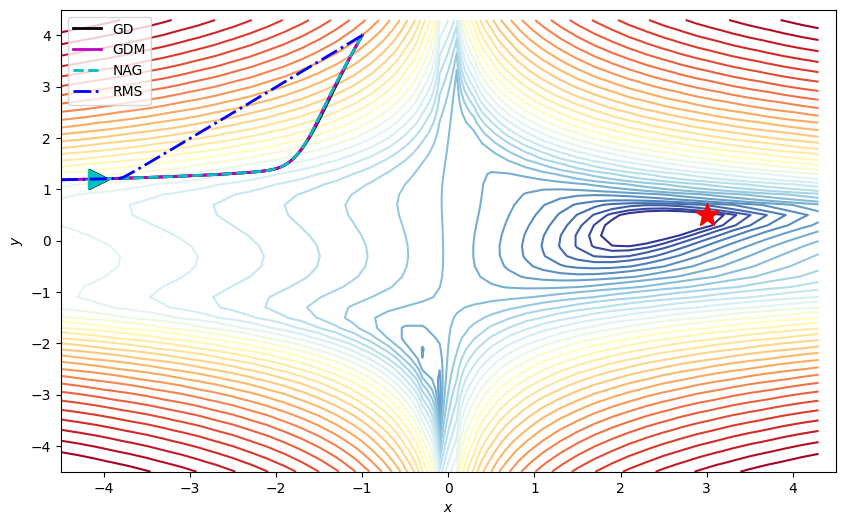

In [41]:
plt.close()
Nsteps=10**4
lr_l=10**-3
lr_s=10**-6

init3=np.array([-1,4])
fig1, ax1=contour_beales_function()

gd_trajectory3=gd(grad_beales_function, init3, 10**5, eta=lr_s, noise_strength=0)
gdm_trajectory3=gd_with_mom(grad_beales_function, init3, 10**5, eta=lr_s, gamma=0.9, noise_strength=0)
NAG_trajectory3=NAG(grad_beales_function, init3, Nsteps, eta=lr_s,gamma=0.9, noise_strength=0)
rms_prop_trajectory3=rms_prop(grad_beales_function, init3, Nsteps, eta=lr_l,beta=0.9, epsilon=10**-8, noise_strength=0)
adams_trajectory3=adams(grad_beales_function, init3, Nsteps, eta=lr_l,beta=0.99, epsilon=10**-8, noise_strength=0)

overlay_trajectory_contour_M(ax1, gd_trajectory3, 'GD', 'k')
overlay_trajectory_contour_M(ax1, gdm_trajectory3, 'GDM', 'm')
overlay_trajectory_contour_M(ax1, NAG_trajectory3, "NAG", 'c--')
overlay_trajectory_contour_M(ax1, rms_prop_trajectory3, "RMS", 'b-.')
overlay_trajectory_contour_M(ax, adams_trajectory3, 'ADAMS', 'r')
plt.legend(loc=2)


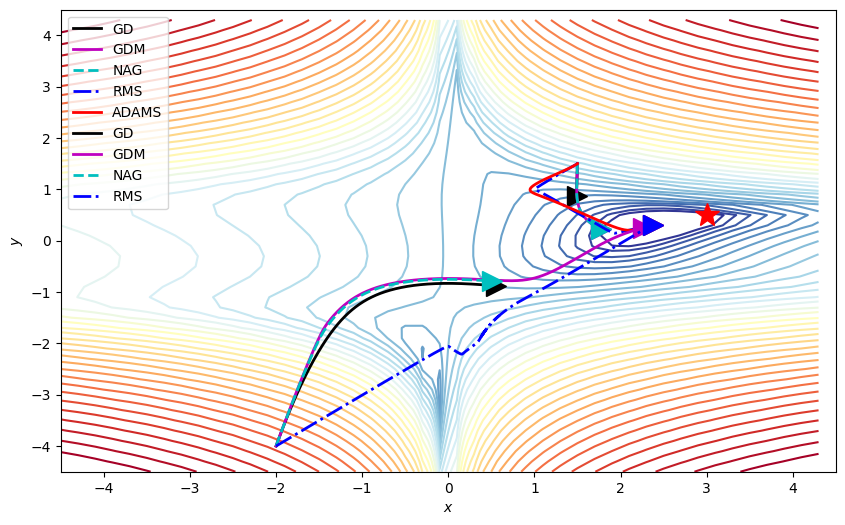

In [44]:
plt.close()
Nsteps=10**4
lr_l=10**-3
lr_s=10**-6
Nsteps=10**4
lr_l=10**-3
lr_s=10**-6

init1=np.array([1.5,1.5])
fig1, ax1=contour_beales_function()

gd_trajectory1=gd(grad_beales_function, init1, Nsteps, eta=lr_s, noise_strength=0)
gdm_trajectory1=gd_with_mom(grad_beales_function, init1, Nsteps, eta=lr_s, gamma=0.9, noise_strength=0)
NAG_trajectory1=NAG(grad_beales_function, init1, Nsteps, eta=lr_s,gamma=0.9, noise_strength=0)
rms_prop_trajectory1=rms_prop(grad_beales_function, init1, Nsteps, eta=lr_l, beta=0.9, epsilon=10**-8, noise_strength=0)
adams_trajectory1=adams(grad_beales_function, init1, Nsteps, eta=lr_l, gamma=0.9, beta=0.99, epsilon=10**-8, noise_strength=0)

overlay_trajectory_contour_M(ax1, gd_trajectory1, "GD", "k")
overlay_trajectory_contour_M(ax1, gdm_trajectory1, "GDM", "m")
overlay_trajectory_contour_M(ax1, NAG_trajectory1, "NAG", "c--")
overlay_trajectory_contour_M(ax1, rms_prop_trajectory1, "RMS", "b-.")
overlay_trajectory_contour_M(ax1, adams_trajectory1, "ADAMS", "r")

init3=np.array([-2,-4])
# fig1, ax1=contour_beales_function()

gd_trajectory3=gd(grad_beales_function, init3, 10**5, eta=lr_s, noise_strength=0)
gdm_trajectory3=gd_with_mom(grad_beales_function, init3, 10**5, eta=lr_s, gamma=0.9, noise_strength=0)
NAG_trajectory3=NAG(grad_beales_function, init3, Nsteps, eta=lr_s,gamma=0.9, noise_strength=0)
rms_prop_trajectory3=rms_prop(grad_beales_function, init3, Nsteps, eta=lr_l,beta=0.9, epsilon=10**-8, noise_strength=0)
adams_trajectory3=adams(grad_beales_function, init3, Nsteps, eta=lr_l,beta=0.99, epsilon=10**-8, noise_strength=0)

overlay_trajectory_contour_M(ax1, gd_trajectory3, 'GD', 'k')
overlay_trajectory_contour_M(ax1, gdm_trajectory3, 'GDM', 'm')
overlay_trajectory_contour_M(ax1, NAG_trajectory3, "NAG", 'c--')
overlay_trajectory_contour_M(ax1, rms_prop_trajectory3, "RMS", 'b-.')
overlay_trajectory_contour_M(ax, adams_trajectory3, 'ADAMS', 'r')
plt.legend(loc=2)
